## Introduction
The real estate market is a dynamic and complex field influenced by numerous factors that affect property values. Predicting house prices accurately is crucial for buyers, sellers, real estate agents, and investors to make informed decisions. This project aims to develop a linear regression model to predict house prices using a variety of independent variables, including physical attributes of the properties, location-based features, and other relevant factors. By leveraging data analysis and machine learning techniques, this project seeks to provide a robust tool for estimating property values, thereby enhancing decision-making processes in the real estate sector.

## Problem Statement
Accurately predicting house prices is a significant challenge due to the multitude of variables that can influence property values. Traditional methods often fail to capture the complexity and interactions between different factors, leading to less reliable predictions. This project addresses the problem of developing a reliable and accurate predictive model for house prices using linear regression, incorporating a comprehensive set of independent variables to improve prediction accuracy.

## Objectives
- Data Exploration and Preprocessing: Explore the provided dataset to understand the distribution of house prices and other relevant features. Identify and address any missing values or outliers that might affect the model's performance.
- Model Building and Training: Build a linear regression model to predict house prices based on the chosen independent variables (bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, yr_built). Train the model on a portion of the dataset.
- Model Evaluation and Refinement: Evaluate the performance of the trained model using metrics like R-squared and Mean Squared Error (MSE) on a separate test set. Analyze the model's coefficients to understand the impact of each feature on the predicted price. Refine the model by potentially including additional features or addressing any identified limitations.

# Import

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## Data Understanding

In [2]:
import pandas as pd
df = pd.read_csv("data\kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

In [6]:
df = df.drop(['id','date','view','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [7]:
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [8]:
df['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

In [9]:
#Impute the missing values in the waterfront column with mean
df['waterfront'].fillna(df['waterfront'].mean(), inplace=True)

In [10]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [12]:
#Encode categorical variable waterfront 
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 1 else 0)


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


There's a strong positive correlation of 0.701917 between price and the sqft_living. This means as the value of sqft_living (footage of living space) increases, the price tends to increase as well. There's a direct relationship between the two variables.

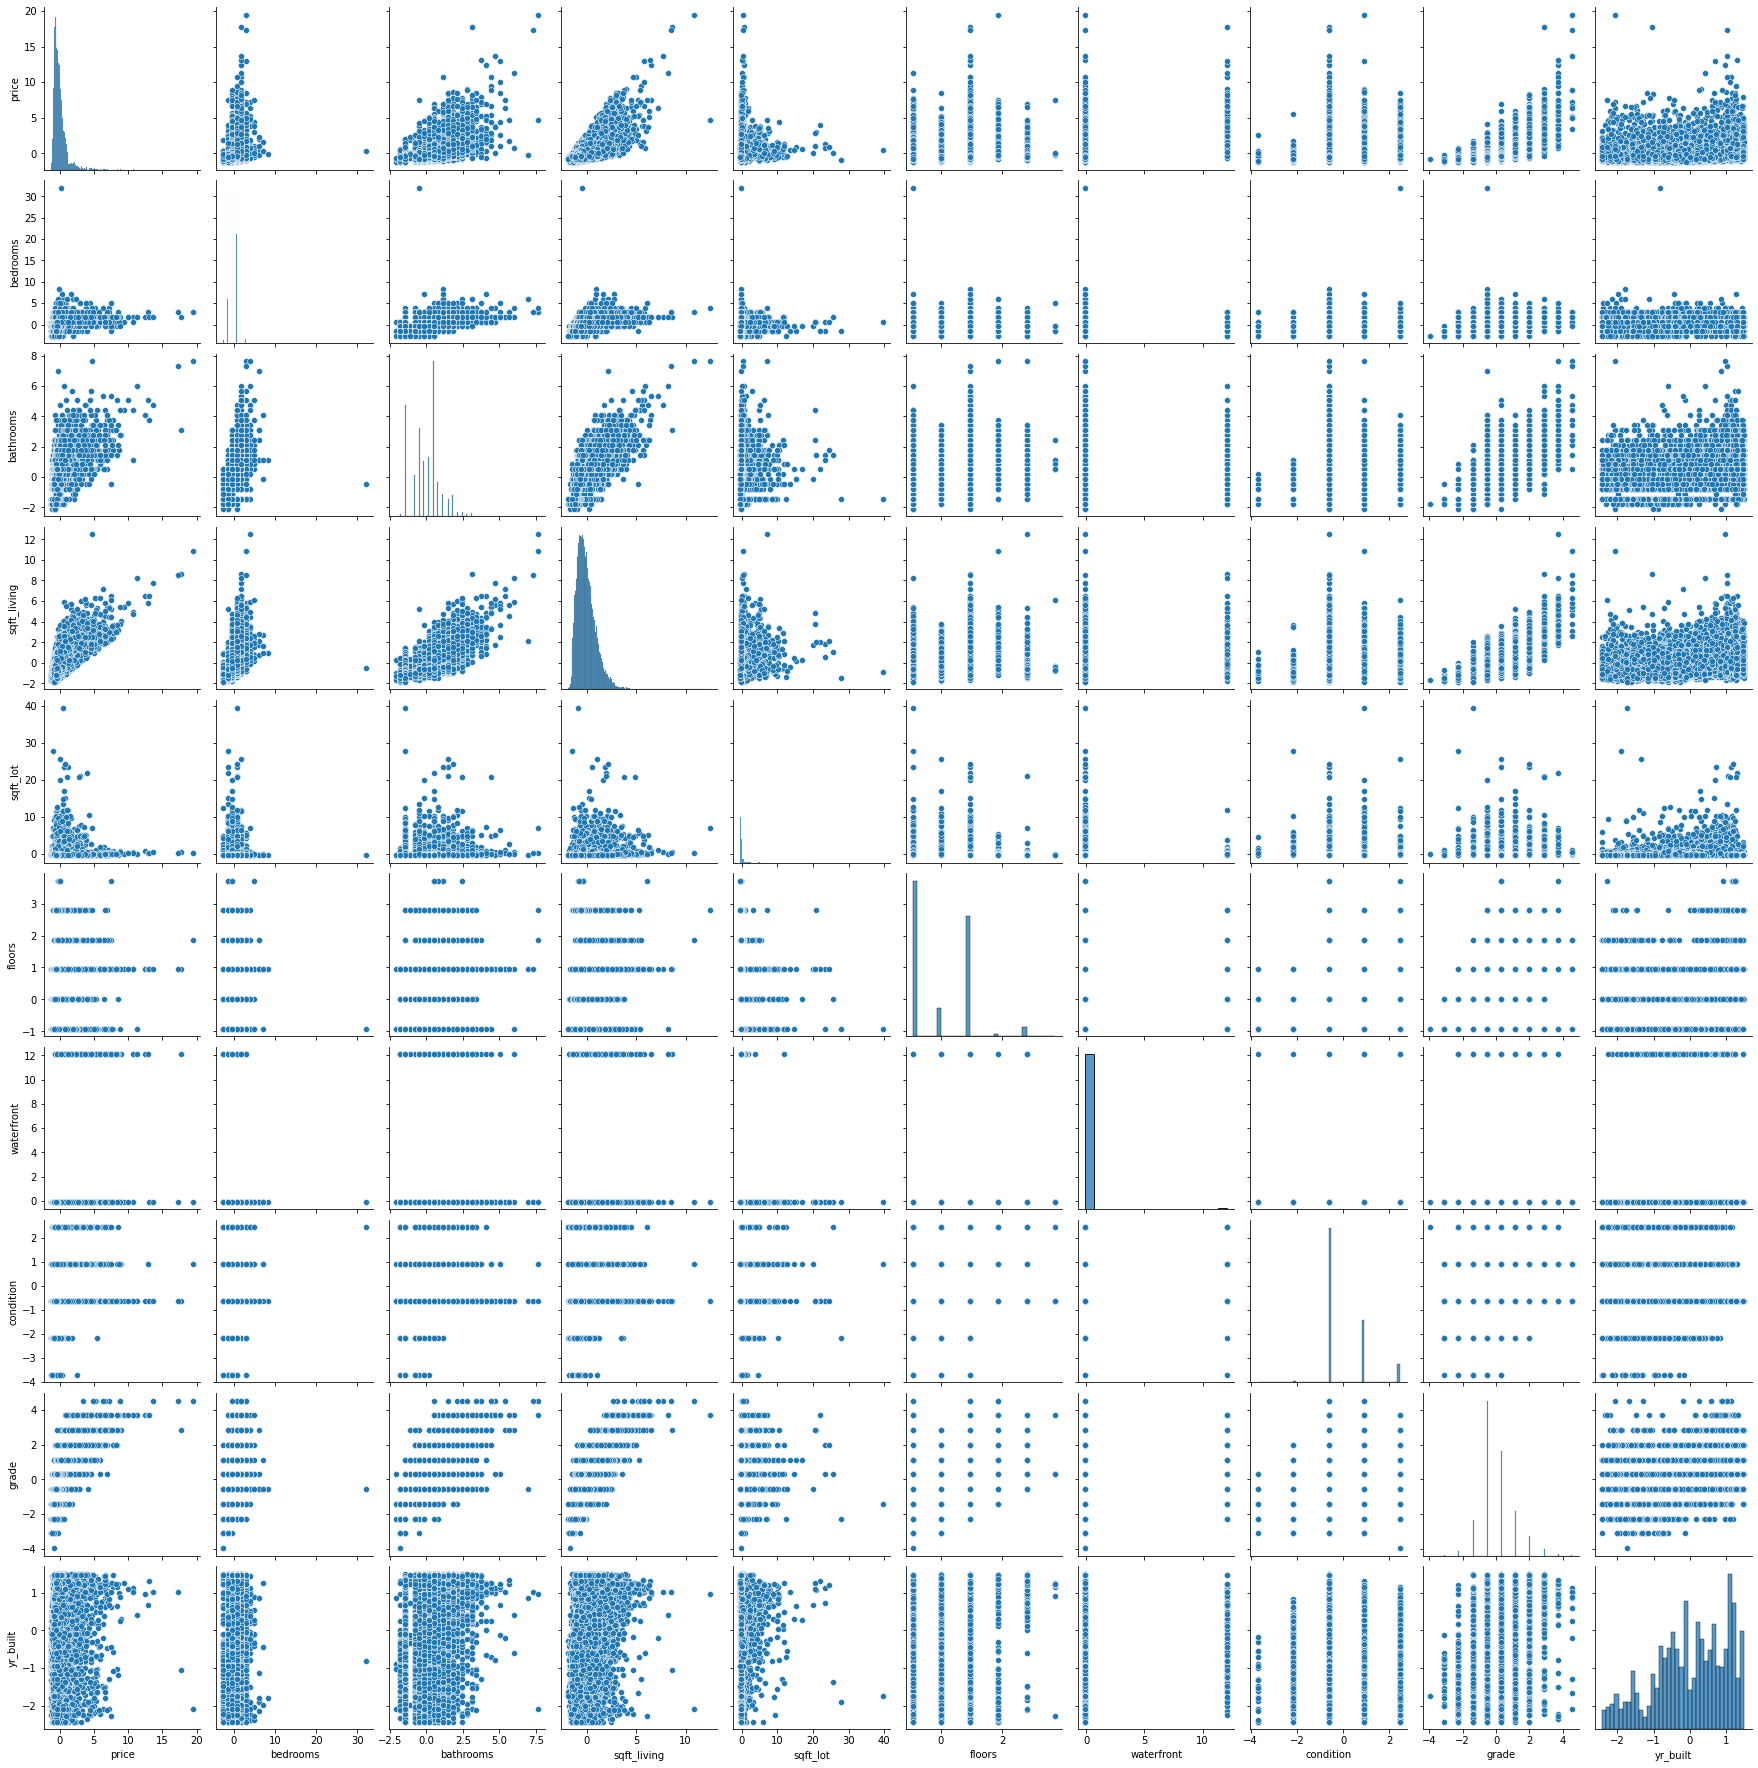

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

## Modeling

Simple linear regression modelling

- Since sqft_living has the highest correlation to price, we'll use it in formulating our simple linear regression model. There's also some sort of linearity between the two variables


In [17]:
x= df['sqft_living']
y=df['price']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=42)


In [19]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [20]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

In [21]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 0.488891126703375
mae 0.46543743079542693
R2 0.49332469237979515


## Multiple Linear Regression Model

In this, well use a 2 different sets of predictor variables and come up whith 2 different models.

In [22]:
X1 = df[['bedrooms','bathrooms','condition','grade']]
X2 = df[['sqft_living','sqft_lot','floors','waterfront','yr_built']]
y = df['price']


In [23]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [24]:
model_1 = LinearRegression()
model_1.fit(X1_train,y_train)

LinearRegression()

In [25]:
y_predict= model_1.predict(X1_test)

In [26]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"R-squared: {r2_score(y_test, y_predict)}")

Mean Absolute Error: 0.46851131265094076
R-squared: 0.4543046771819069


In [30]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model_2 = LinearRegression()
model_2.fit(X2_train,y_train)
y_predict= model_2.predict(X2_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"R-squared: {r2_score(y_test, y_predict)}")

Mean Absolute Error: 0.4401634484879425
R-squared: 0.5621256544733907
